In [2]:
#Disclaimer: This script, whose goal is to analyze the normal spacing distribution, has not been completed and optimized.
#i still have to understand how to associate flags to the ASSIGNMENT #2 EX.2 program, so that i dont have
# to modify the code to run the script both for the hermitian and for the real matrix. 
#The choice to add this file is due to the possibility of showing how i proceeded into the fitting and plotting part 
# of the exercise.

In [3]:
import numpy as np
import subprocess
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

In [4]:
mat_dim = 1000

In [5]:
#reset files
os.remove("./Normalized_Spacing.txt")

#runs the program n times.
for i in range(40):
    eigen = subprocess.run(["./Exercise2.out"], input="{}".format(mat_dim), 
                        stdout=subprocess.PIPE, encoding="utf-8")
eigen

CompletedProcess(args=['./Exercise2.out'], returncode=0, stdout='')

In [6]:
#runs the program n times. in this case the logical variable "diagonal" has to be set to .true. in the FORTRAN CODE.
os.remove("./Normalized_Spacing_random.txt")
mat_dim2 = 1000
for i in range(40):
    eigen = subprocess.run(["./Exercise2.out"], input="{}".format(mat_dim2), 
                        stdout=subprocess.PIPE, encoding="utf-8")
eigen

CompletedProcess(args=['./Exercise2.out'], returncode=0, stdout='')

In [8]:
#Load saved data.
#first txt file could have been deleted, or not yet generated by the Fortran executable file. (This could stop the fortran script).
#Changing from the first and the second we get the 2 different distributions.
norm_spacing = np.loadtxt("Normalized_Spacing.txt", dtype = "float")
norm_spacing2 = np.loadtxt("Normalized_Spacing_random.txt", dtype = "float")
#print(norm_spacing)

FileNotFoundError: Normalized_Spacing.txt not found.

In [ ]:
def distribution_model(x, a, b, c, d):
        return a * x ** b * np.exp(c * x ** d)

/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_9403/4234226278.py:2: RuntimeWarning: overflow encountered in exp
  return a * x ** b * np.exp(c * x ** d)
/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_9403/3789881511.py:11: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(pcov)


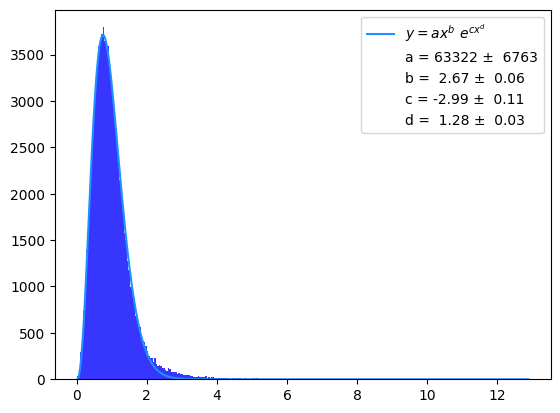

In [ ]:
#plot of hermitian normalized spacing distribution
binning = 300

n, bins, patches = plt.hist(norm_spacing, binning, density=False, facecolor='b', alpha=0.79)

bin_center = bins[:-1] + np.diff(bins) / 2
x_fit = np.linspace(bins[0], bins[-1], 1000)

popt, pcov = curve_fit(distribution_model, bin_center, n, p0 = [5000., 1., -2.6, 10.])
err = np.sqrt(pcov)

plt.plot(x_fit, distribution_model(x_fit, *popt), 'dodgerblue', label = "$y = ax^b \ e^{cx^d}$")
plt.plot([], [], ' ', label=(f"a = {popt[0]:5.0f} \u00B1 {err[0, 0]:5.0f}"))
plt.plot([], [], ' ', label=(f"b = {popt[1]:5.2f} \u00B1 {err[1, 1]:5.2f}"))
plt.plot([], [], ' ', label=(f"c = {popt[2]:5.2f} \u00B1 {err[2, 2]:5.2f}"))
plt.plot([], [], ' ', label=(f"d = {popt[3]:5.2f} \u00B1 {err[3, 3]:5.2f}"))
plt.legend(loc='best')

plt.savefig(f'Plots/fit_histo.png')
plt.show()#; suppress plot, unecpectly
plt.ioff()
    
plt.close()

In [ ]:
#plot of real diagonal matrix - normalized spacing distribution
n, bins, patches = plt.hist(norm_spacing2, 400, density=False, facecolor='r',  alpha = 0.7, normed=1)
bin_center = bins[:-1] + np.diff(bins) / 2
x_fit = np.linspace(bins[0], bins[-1], 1000)
popt2, pcov2 = curve_fit(distribution_model, bin_center, n, p0 = [1000., 0., -1., 1.])
err2 = np.sqrt(pcov2)

plt.plot(x_fit, distribution_model(x_fit, *popt2), 'tomato', label = "$y = ax^b \ e^{cx^d}$")
plt.plot([], [], ' ', label=(f"a = {popt2[0]:5.0f} \u00B1 {err2[0, 0]:5.0f}"))
plt.plot([], [], ' ', label=(f"b = {popt2[1]:5.2f} \u00B1 {err2[1, 1]:5.3f}"))
plt.plot([], [], ' ', label=(f"c = {popt2[2]:5.2f} \u00B1 {err2[2, 2]:5.2f}"))
plt.plot([], [], ' ', label=(f"d = {popt2[3]:5.2f} \u00B1 {err2[3, 3]:5.3f}"))
plt.legend(loc='best')

plt.savefig(f'Plots/fit_histo2.png')
plt.show()#; suppress plot, unecpectly
plt.ioff()
    
plt.close()

err2

NameError: name 'plt' is not defined